# **TASK**

a. Plot data yang sudah diperoleh

b. Periksa kestasioneran data terhadap Variansi, menggunakan Box-Cox

c. Periksa kestasioneran data terhadap Mean gunakan Uji ADF

d. Apabila data tidak stasioner terhadap variansi, maka lakukan transformasi sesuai dengan nilai λ.

e. Apabila data tidak stasioner terhadap mean, maka lakukan differencing (d).

f.  Plot ACF dan PACF, kemudian identifikasi ordernya berdasarkan nilai ACF, dan PACF yang mengalami cut-off setelah lag tertentu.

g. Identifikasi model ARMA(p,q) atau ARIMA(p,d,q)

h. Pilih model yang terbaik, dari beberapa kombinasi model yang diperoleh dari langkah e, menggunakan nilai AIC.

i.  Estimasi parameter menggunakan metode Maximum Likelihood, kemudian diuji siginifikasi terhadap parameter.

j.  Lakukan Uji Kelayakan model menggunakan Ljung-Box

k. Lakukan Uji Kenormalan sisaan dengan menggunakan Kolmogorof-Smirnov atau Shapiro-Wilks.

l.  Lakukan forecasting, kemudian hitung RMSE

m.Lakukan analisis pada semua tahapan a – l.

# **Pendahuluan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro, kstest
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
import seaborn as sns
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Plot Data

In [ ]:
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

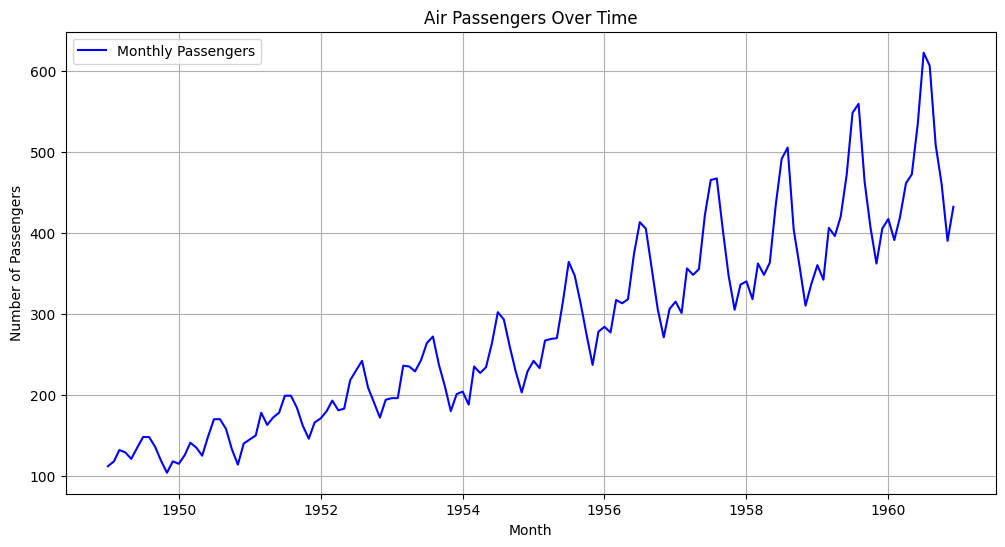

In [ ]:
# Plot data
plt.figure(figsize=(12, 6))
plt.plot(data['#Passengers'], label='Monthly Passengers', color='blue')
plt.title('Air Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid()
plt.show()

# **Uji Stasioneritas**

## **Variansi**

In [ ]:
if (data['#Passengers'] <= 0).any():
    data['#Passengers'] += 1

In [ ]:
data_skewness = skew(data)
print("Skewness Data Awal:", data_skewness)

Skewness Data Awal: [0.57706823]


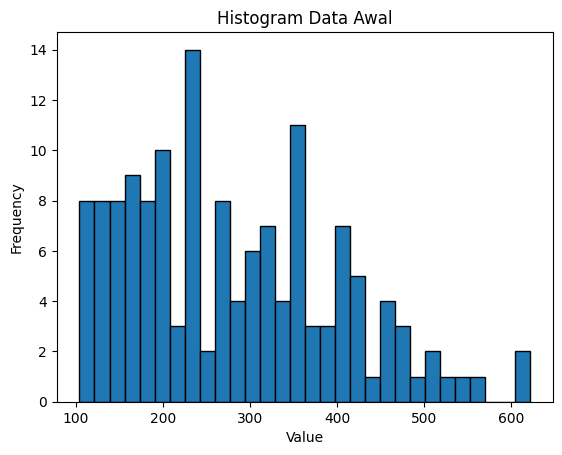

In [ ]:
plt.hist(data, bins=30, edgecolor='k')
plt.title("Histogram Data Awal")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

Skewness Data Setelah Box-Cox: -0.021223446962313562
Nilai λ (Lambda): 0.14802254856840585


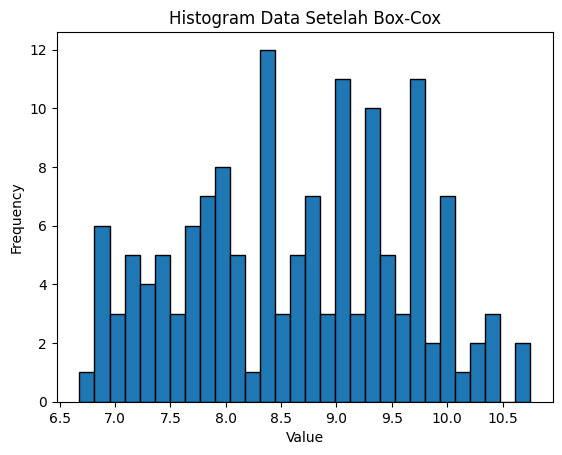

In [ ]:
data_boxcox, lambda_ = boxcox(data['#Passengers'])

data_boxcox_skewness = skew(data_boxcox)
print("Skewness Data Setelah Box-Cox:", data_boxcox_skewness)

print("Nilai λ (Lambda):", lambda_)

plt.hist(data_boxcox, bins=30, edgecolor='k')
plt.title("Histogram Data Setelah Box-Cox")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
fitted_boxcox = pd.DataFrame()
fitted_boxcox['Month'] = data.index
fitted_boxcox['#Passengers'] = data_boxcox
fitted_boxcox = fitted_boxcox.set_index('Month')
fitted_boxcox.head()

,#Passengers
Month,
1949-01-01,6.827488
1949-02-01,6.932820
1949-03-01,7.161889
1949-04-01,7.114609
1949-05-01,6.983785


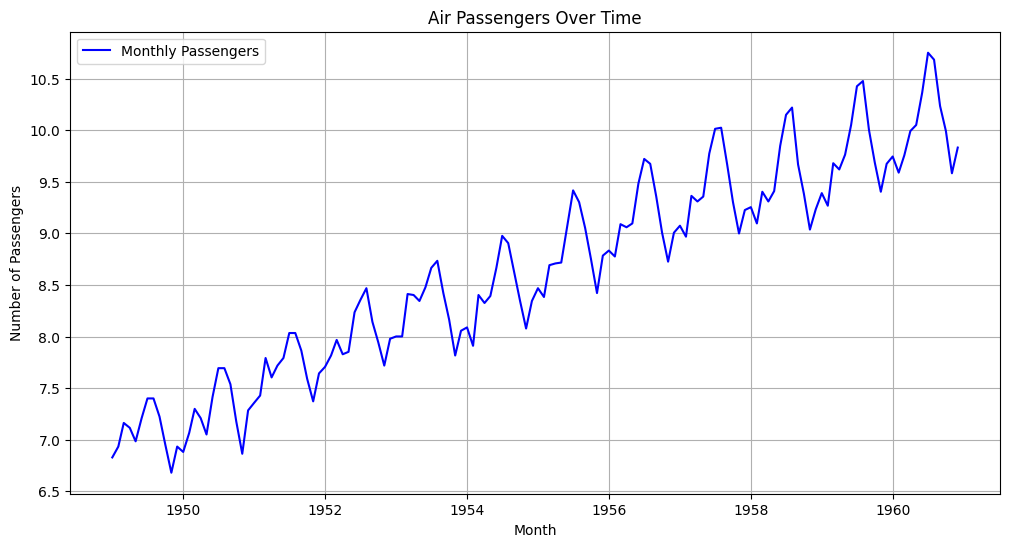

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(fitted_boxcox['#Passengers'], label='Monthly Passengers', color='blue')
plt.title('Air Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid()
plt.show()

## **Mean**


ADF Test Results (Differencing Order 1):
Test Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


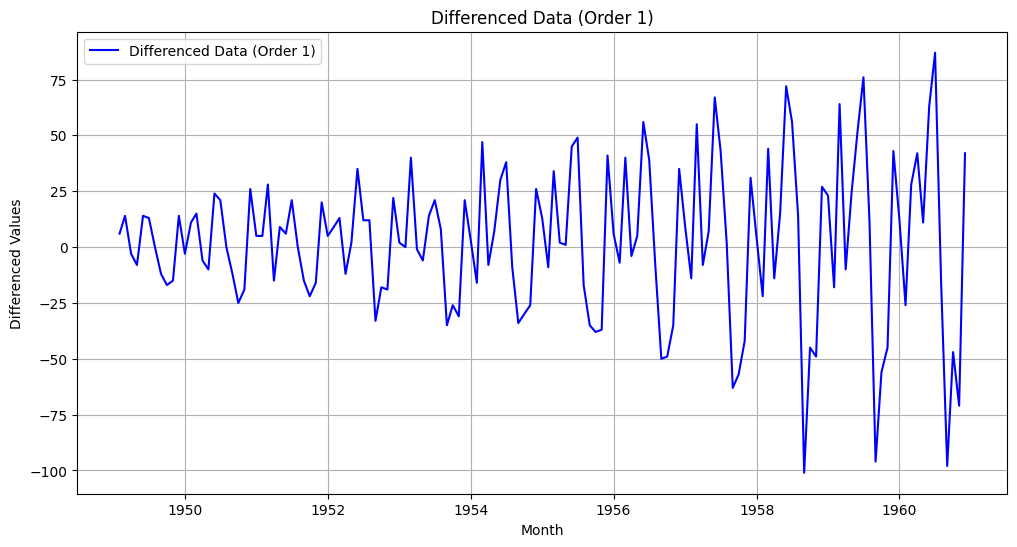


Data is almost stationary after first differencing try go to next step.


In [ ]:
# Uji ADF
diff_data = data['#Passengers'].diff().dropna()  # d = 1

adf_result = adfuller(diff_data)
print("\nADF Test Results (Differencing Order 1):")
print(f"Test Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")

plt.figure(figsize=(12, 6))
plt.plot(diff_data, label='Differenced Data (Order 1)', color='blue')
plt.title('Differenced Data (Order 1)')
plt.xlabel('Month')
plt.ylabel('Differenced Values')
plt.legend()
plt.grid()
plt.show()

if adf_result[1] <= 0.05:
    print("\nData is stationary after first differencing.")
elif 0.05 < adf_result[1] <= 0.1:
    print("\nData is almost stationary after first differencing try go to next step.")
else:
    print("\nData is not stationary after first differencing.")


In [ ]:
data_d1 = diff_data
data_d1

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0



ADF Test Results (Differencing Order 0):
Test Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


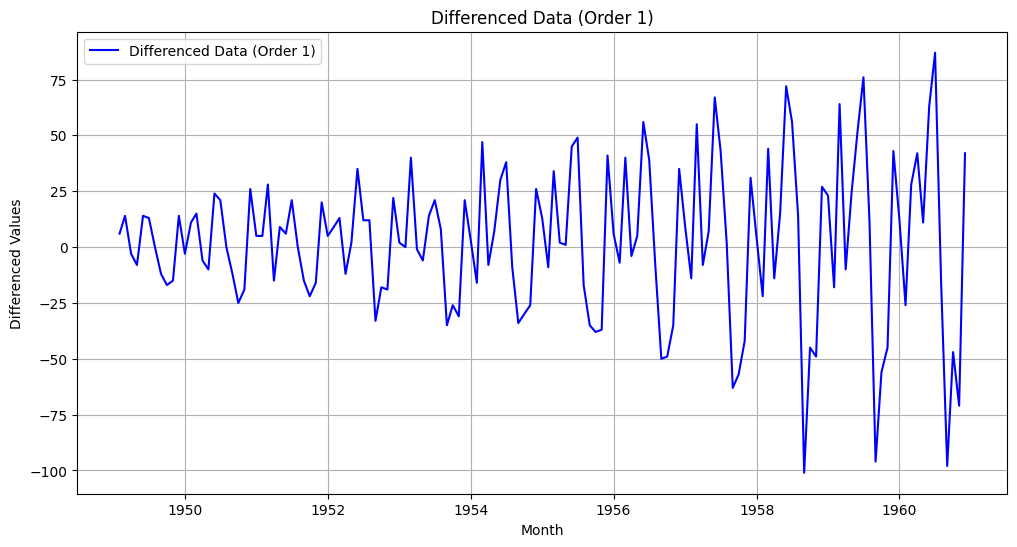


ADF Test Results (Differencing Order 1):
Test Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


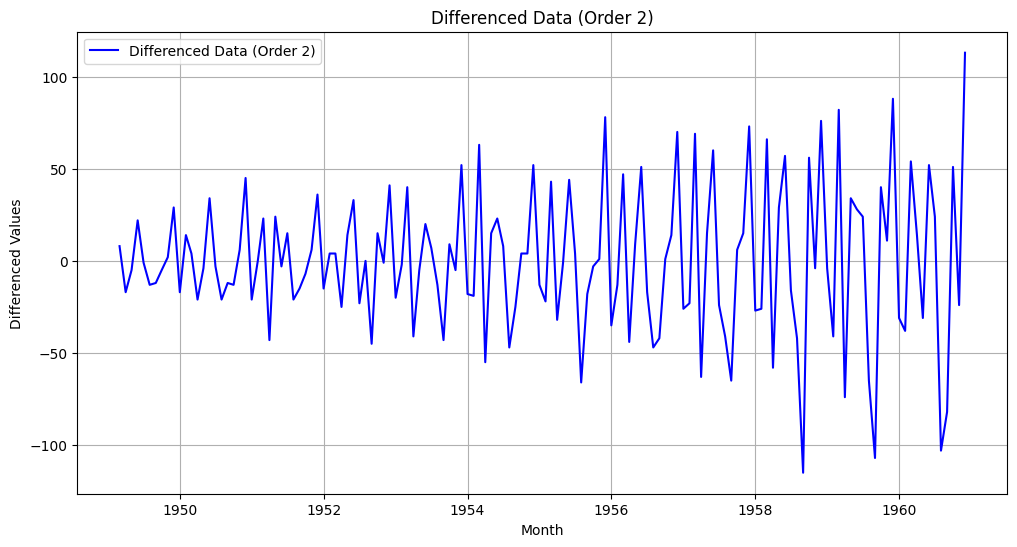


ADF Test Results (Differencing Order 2):
Test Statistic: -16.384231542468513
p-value: 2.7328918500142026e-29
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}

Data is stationary at differencing order 2.

Final Stationary Data Achieved.
Differencing Order: 2


In [ ]:
diff_data = data['#Passengers']
diff_order = 0

while True:
    adf_result = adfuller(diff_data.dropna())
    print(f"\nADF Test Results (Differencing Order {diff_order}):")
    print(f"Test Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print(f"Critical Values: {adf_result[4]}")

    if adf_result[1] <= 0.05:
        print(f"\nData is stationary at differencing order {diff_order}.")
        break

    diff_data = diff_data.diff()
    diff_order += 1

    plt.figure(figsize=(12, 6))
    plt.plot(diff_data.dropna(), label=f'Differenced Data (Order {diff_order})', color='blue')
    plt.title(f'Differenced Data (Order {diff_order})')
    plt.xlabel('Month')
    plt.ylabel('Differenced Values')
    plt.legend()
    plt.grid()
    plt.show()

print("\nFinal Stationary Data Achieved.")
print(f"Differencing Order: {diff_order}")


In [ ]:
data_d2 = diff_data
data_d2

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0



ADF Test Results (Differencing Order 0):
Test Statistic: -1.3260711769488467
p-value: 0.6171619357969327
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


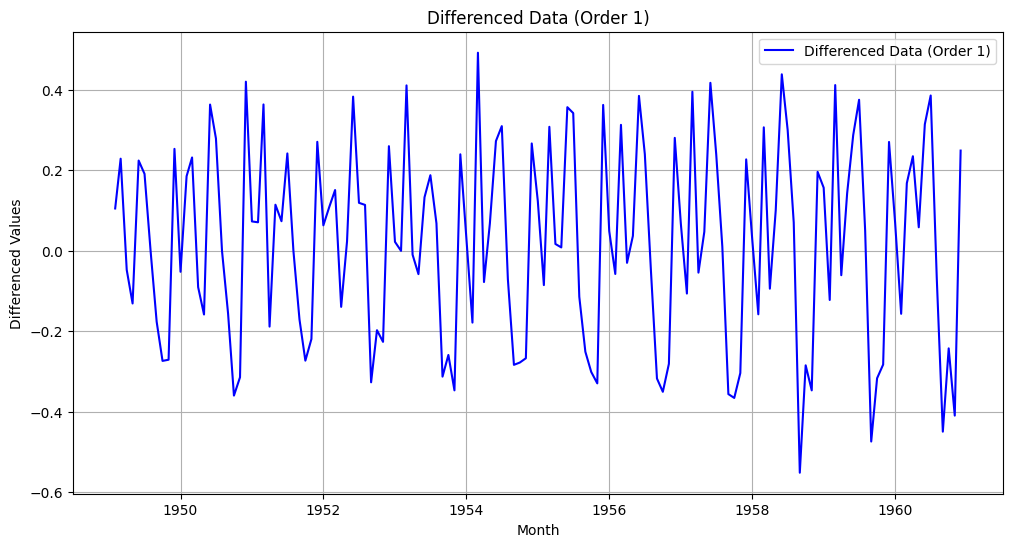


ADF Test Results (Differencing Order 1):
Test Statistic: -2.871707432314742
p-value: 0.048738345775861384
Critical Values: {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}

Data is stationary at differencing order 1.

Final Stationary Data Achieved.
Differencing Order: 1


In [ ]:
# Data Boxcox
diff_data = fitted_boxcox['#Passengers']
diff_order = 0

while True:
    adf_result = adfuller(diff_data.dropna())
    print(f"\nADF Test Results (Differencing Order {diff_order}):")
    print(f"Test Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print(f"Critical Values: {adf_result[4]}")

    if adf_result[1] <= 0.05:
        print(f"\nData is stationary at differencing order {diff_order}.")
        break

    diff_data = diff_data.diff()
    diff_order += 1

    plt.figure(figsize=(12, 6))
    plt.plot(diff_data.dropna(), label=f'Differenced Data (Order {diff_order})', color='blue')
    plt.title(f'Differenced Data (Order {diff_order})')
    plt.xlabel('Month')
    plt.ylabel('Differenced Values')
    plt.legend()
    plt.grid()
    plt.show()

print("\nFinal Stationary Data Achieved.")
print(f"Differencing Order: {diff_order}")

In [ ]:
data_boxcox = diff_data
data_boxcox

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,0.105332
1949-03-01,0.229069
1949-04-01,-0.047281
1949-05-01,-0.130824
...,...
1960-08-01,-0.067404
1960-09-01,-0.449476
1960-10-01,-0.242414


## **Fit Data Setelah Uji Stasioneritas**

In [ ]:
# After Boxcox
data_boxcox = data_boxcox.dropna()
print('Data setelah dilakukan boxcox dan d = 1')
print(data_boxcox)

# Before Boxcox
data_d2 = data_d2.dropna()
print('Data setelah dilakukan d = 2 tanpa boxcox')
print(data_d2)

data_d1 = data_d1.dropna()
print('Data setelah dilakukan d = 1 tanpa boxcox')
print(data_d1)

Data setelah dilakukan boxcox dan d = 1
Month
1949-02-01    0.105332
1949-03-01    0.229069
1949-04-01   -0.047281
1949-05-01   -0.130824
1949-06-01    0.224478
                ...   
1960-08-01   -0.067404
1960-09-01   -0.449476
1960-10-01   -0.242414
1960-11-01   -0.409536
1960-12-01    0.249238
Name: #Passengers, Length: 143, dtype: float64
Data setelah dilakukan d = 2 tanpa boxcox
Month
1949-03-01      8.0
1949-04-01    -17.0
1949-05-01     -5.0
1949-06-01     22.0
1949-07-01     -1.0
              ...  
1960-08-01   -103.0
1960-09-01    -82.0
1960-10-01     51.0
1960-11-01    -24.0
1960-12-01    113.0
Name: #Passengers, Length: 142, dtype: float64
Data setelah dilakukan d = 1 tanpa boxcox
Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 143, dtype: float64


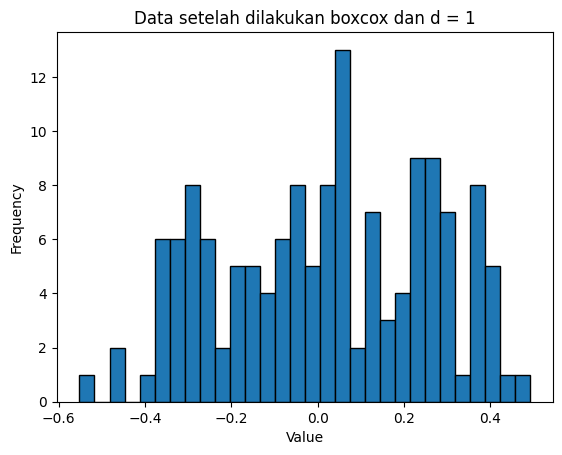

In [ ]:
# Histogram
plt.hist(data_boxcox, bins=30, edgecolor='k')
plt.title("Data setelah dilakukan boxcox dan d = 1")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

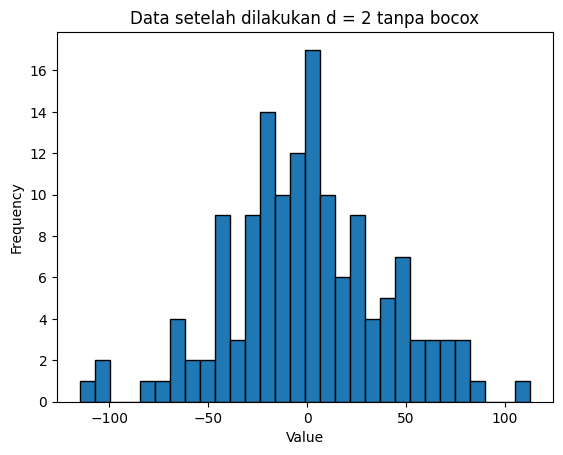

In [ ]:
# Histogram
plt.hist(data_d2, bins=30, edgecolor='k')
plt.title("Data setelah dilakukan d = 2 tanpa bocox")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

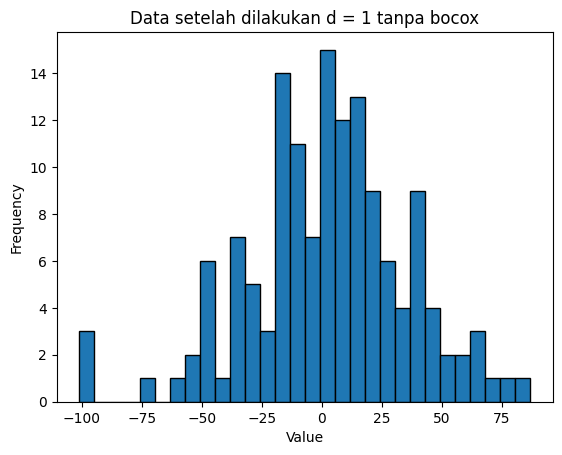

In [ ]:
# Histogram
plt.hist(data_d1, bins=30, edgecolor='k')
plt.title("Data setelah dilakukan d = 1 tanpa bocox")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# **Plot ACF PACF**

<Figure size 1200x600 with 0 Axes>

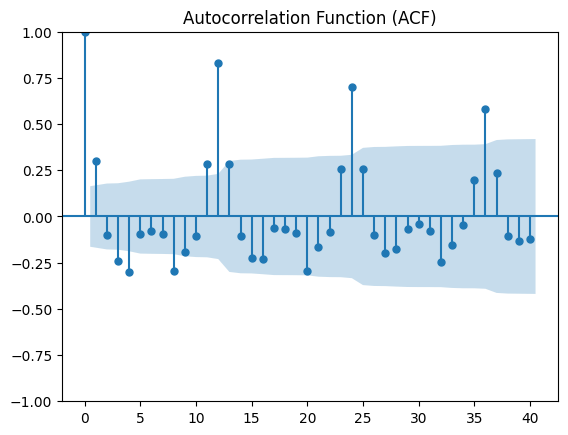

<Figure size 1200x600 with 0 Axes>

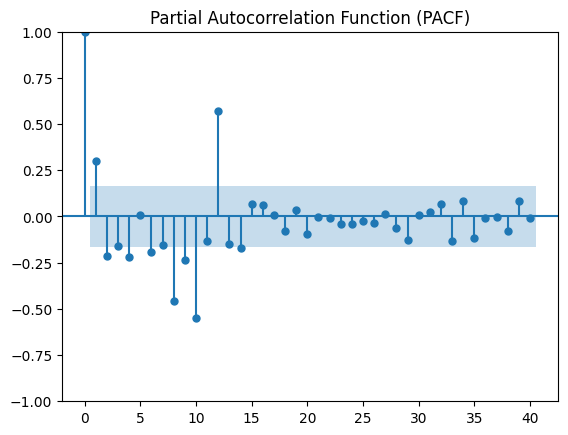

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(data_d1 if adf_result[1] > 0.05 else data['#Passengers'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data_d1 if adf_result[1] > 0.05 else data['#Passengers'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# (2,1,1)

<Figure size 1200x600 with 0 Axes>

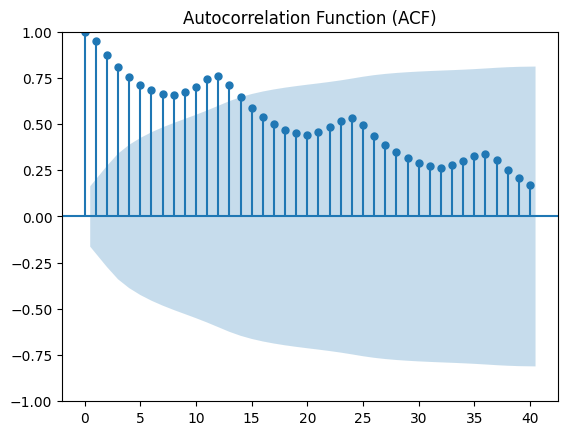

<Figure size 1200x600 with 0 Axes>

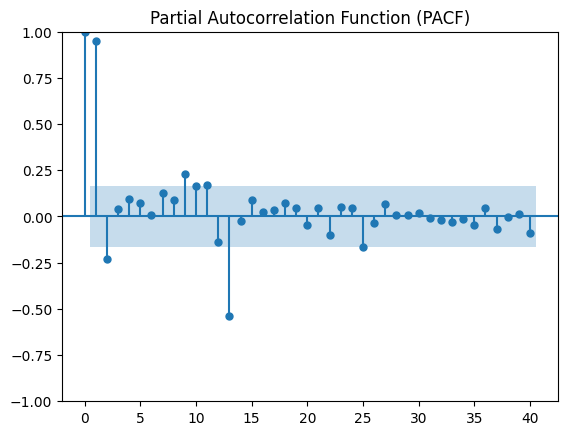

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(data_boxcox if adf_result[1] > 0.05 else data['#Passengers'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data_boxcox if adf_result[1] > 0.05 else data['#Passengers'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# (2,1,1)

<Figure size 1200x600 with 0 Axes>

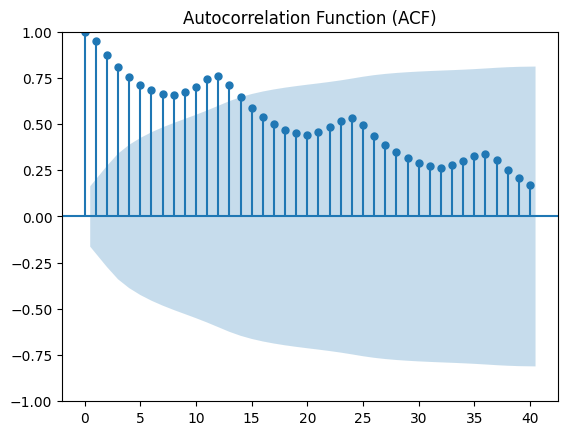

<Figure size 1200x600 with 0 Axes>

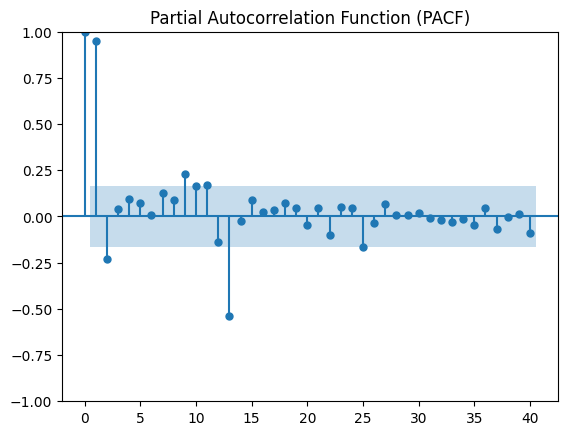

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(data_d2 if adf_result[1] > 0.05 else data['#Passengers'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data_d2 if adf_result[1] > 0.05 else data['#Passengers'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# (2,2,2)

(2,1,1)(1,1,1)

# **Identifikasi Orde Berdasarkan nilai AIC**

In [ ]:
data_d1

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [ ]:
data_d1 = data_d1.to_frame(name='#Passengers')
print(data_d1.columns)

Index(['#Passengers'], dtype='object')


In [ ]:
data_d1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 1949-02-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #Passengers  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [ ]:
time_series = data_d1['#Passengers']

In [ ]:
# Insialisasi orde yang mungkin
p = range(0, 3)
d = [1,2]
q = range(0, 3)

P = range(0, 2)
D = [1,2]
Q = range(0, 2)

s = 12

results = []

for param in itertools.product(p, d, q):
    for seasonal_param in itertools.product(P, D, Q, [s]):
        try:
            model = SARIMAX(time_series, order=param, seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
            result = model.fit(disp=False)
            results.append((param, seasonal_param, result.aic))
        except Exception as e:
            continue

results = sorted(results, key=lambda x: x[2])

print("Top SARIMA Models by AIC:")
for param, seasonal_param, aic in results[:5]:
    print(f"SARIMA{param}x{seasonal_param} | AIC: {aic}")

best_model = results[0]
print(f"""
Best SARIMA Model:
Order (p, d, q)          : {best_model[0]}
Seasonal Order (P, D, Q, s): {best_model[1]}
AIC                      : {best_model[2]}
""")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Top SARIMA Models by AIC:
SARIMA(2, 1, 2)x(0, 1, 1, 12) | AIC: 910.391695060572
SARIMA(0, 1, 2)x(0, 1, 1, 12) | AIC: 910.3975996893611
SARIMA(0, 1, 2)x(1, 1, 1, 12) | AIC: 910.4576969310651
SARIMA(2, 1, 2)x(1, 1, 1, 12) | AIC: 910.6224707518539
SARIMA(1, 1, 2)x(0, 1, 1, 12) | AIC: 912.1216491480782

Best SARIMA Model:
Order (p, d, q)          : (2, 1, 2)
Seasonal Order (P, D, Q, s): (0, 1, 1, 12)
AIC                      : 910.391695060572



In [ ]:
# Tingkatkan variansi untuk ordenya
p = range(0, 3)
d = [1,2]
q = range(0, 3)

P = range(0, 2)
D = [1,2]
Q = range(0, 2)

s = 12

results = []

for param in itertools.product(p, d, q):
    for seasonal_param in itertools.product(P, D, Q, [s]):
        try:
            model = SARIMAX(time_series, order=param, seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
            result = model.fit(disp=False)
            results.append((param, seasonal_param, result.aic))
        except Exception as e:
            continue

results = sorted(results, key=lambda x: x[2])

print("Top SARIMA Models by AIC:")
for param, seasonal_param, aic in results[:5]:
    print(f"SARIMA{param}x{seasonal_param} | AIC: {aic}")

best_model = results[0]
print(f"""
Best SARIMA Model:
Order (p, d, q)          : {best_model[0]}
Seasonal Order (P, D, Q, s): {best_model[1]}
AIC                      : {best_model[2]}
""")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Top SARIMA Models by AIC:
SARIMA(0, 1, 2)x(1, 2, 1, 12) | AIC: 823.8488243133694
SARIMA(1, 2, 2)x(0, 2, 1, 12) | AIC: 824.5955898525935
SARIMA(1, 1, 2)x(1, 2, 1, 12) | AIC: 825.5615088283619
SARIMA(2, 1, 2)x(1, 2, 1, 12) | AIC: 825.9126334117566
SARIMA(2, 2, 2)x(0, 2, 1, 12) | AIC: 826.4777966745319

Best SARIMA Model:
Order (p, d, q)          : (0, 1, 2)
Seasonal Order (P, D, Q, s): (1, 2, 1, 12)
AIC                      : 823.8488243133694



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Yg ini kayaknya overfitting jadi pake yg atasnya

In [ ]:
model = SARIMAX(
    time_series,
    order=(2, 1, 2),
    seasonal_order=(0, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result = model.fit()

print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                          #Passengers   No. Observations:                  143
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -449.196
Date:                              Mon, 30 Dec 2024   AIC                            910.392
Time:                                      10:33:10   BIC                            926.861
Sample:                                  02-01-1949   HQIC                           917.077
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2590      0.111    -11.297      0.000      -1.477      -1.041
ar.L2         -0.34

In [ ]:
model = SARIMAX(
    time_series,
    order=(2, 1, 2),
    seasonal_order=(0, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result = model.fit()

print(result.summary())

# **Uji Signifikasi**

In [ ]:
p_values = result.pvalues

significant_params = p_values[p_values < 0.05]
insignificant_params = p_values[p_values >= 0.05]

print("\nSignificant Parameters (p-value < 0.05):")
print(significant_params)

print("\nInsignificant Parameters (p-value >= 0.05):")
print(insignificant_params)


Significant Parameters (p-value < 0.05):
ar.L1     1.361188e-29
ar.L2     2.132178e-05
ma.L2     7.578577e-10
sigma2    0.000000e+00
dtype: float64

Insignificant Parameters (p-value >= 0.05):
ma.L1       0.905785
ma.S.L12    0.387494
dtype: float64


Parameter Signifikan:

ar.L1, ar.L2, ma.L2, dan sigma2 memberikan kontribusi signifikan pada model.

Parameter ini layak dipertahankan dalam model.

Parameter Tidak Signifikan:

ma.L1 dan ma.S.L12 tidak signifikan secara statistik.

Parameter ini dapat dipertimbangkan untuk dihapus dari model untuk menyederhanakan struktur tanpa mengorbankan akurasi.

# **Uji Kelayakan model**

In [ ]:
# Ljung-Box
residuals = result.resid

ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)

print("Ljung-Box Test Results:")
print(ljung_box_results)

Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  14.475905    0.15237


p-value = 0.15237 > 0.05 (dengan tingkat signifikansi 5%).

Hasil ini menunjukkan bahwa residual model bersifat white noise

Model ini layak berdasarkan uji Ljung-Box



# **Uji Kenormalan sisaan**

In [ ]:
# Shapiro-Wilk
shapiro_test_stat, shapiro_p_value = shapiro(residuals)

# Kolmogorov-Smirnov
kstest_stat, kstest_p_value = kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))

print("\nShapiro-Wilk Test Results:")
print(f"Test Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}")

print("\nKolmogorov-Smirnov Test Results:")
print(f"Test Statistic: {kstest_stat}, p-value: {kstest_p_value}")


Shapiro-Wilk Test Results:
Test Statistic: 0.9876583793378971, p-value: 0.23396832455090433

Kolmogorov-Smirnov Test Results:
Test Statistic: 0.050024788812849885, p-value: 0.8487868905334632


Shapiro-Wilk Test
Test Statistic: 0.9876583793378971
p-value: 0.23396832455090433
Interpretasi:

Hipotesis nol (
𝐻
0
H
0
​
 ): Residual berasal dari distribusi normal.

Karena
𝑝
p-value = 0.2339 > 0.05, kita tidak menolak hipotesis nol.

Artinya, residual model berdistribusi normal secara statistik berdasarkan uji Shapiro-Wilk.


Kolmogorov-Smirnov Test
Test Statistic: 0.050024788812849885
p-value: 0.8487868905334632
Interpretasi:

Hipotesis nol (
𝐻
0
H
0
​
 ): Residual berasal dari distribusi normal.

Karena
𝑝
p-value = 0.8488 > 0.05, kita tidak menolak hipotesis nol.

Artinya, residual model berdistribusi normal secara statistik berdasarkan uji Kolmogorov-Smirnov.

# **Forecasting Dataset Differencing Training Model**

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

forecast_steps = 12
forecast = result.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

confidence_intervals = forecast.conf_int()

actual_data = time_series[-forecast_steps:]

rmse = np.sqrt(mean_squared_error(actual_data, forecast_mean))

print("Forecasted Values:")
print(forecast_mean)

print("\nActual Values:")
print(actual_data)

print(f"\nRoot Mean Squared Error (RMSE): {rmse}")

Forecasted Values:
1961-01-01    18.681039
1961-02-01   -32.244372
1961-03-01    38.445157
1961-04-01    30.936835
1961-05-01    17.901800
1961-06-01    57.550256
1961-07-01    90.076200
1961-08-01   -16.742124
1961-09-01   -94.678752
1961-10-01   -50.052132
1961-11-01   -66.288333
1961-12-01    40.363021
Freq: MS, Name: predicted_mean, dtype: float64

Actual Values:
Month
1960-01-01    12.0
1960-02-01   -26.0
1960-03-01    28.0
1960-04-01    42.0
1960-05-01    11.0
1960-06-01    63.0
1960-07-01    87.0
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, dtype: float64

Root Mean Squared Error (RMSE): 6.10803695838628


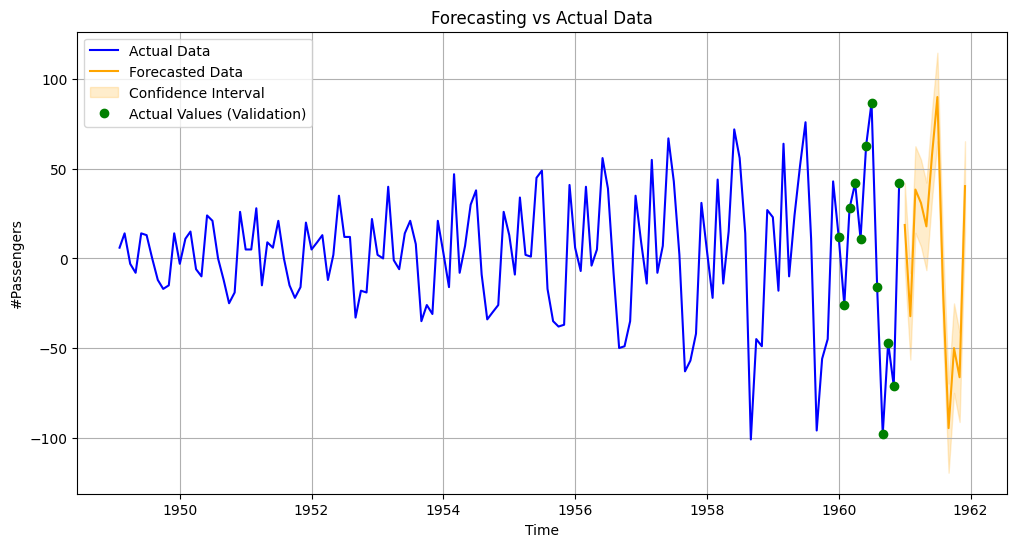

In [ ]:
forecast_mean = forecast.predicted_mean
confidence_intervals = confidence_intervals.iloc[:len(forecast_mean)]

plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Actual Data", color="blue")
plt.plot(forecast_mean.index, forecast_mean, label="Forecasted Data", color="orange")
plt.fill_between(
    forecast_mean.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='orange', alpha=0.2, label="Confidence Interval"
)

plt.plot(actual_data.index, actual_data, 'o', label="Actual Values (Validation)", color="green")

plt.title("Forecasting vs Actual Data")
plt.xlabel("Time")
plt.ylabel("#Passengers")
plt.legend()
plt.grid()
plt.show()

# **Forecasting dan Fit Datasetnya**

In [ ]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

model = SARIMAX(
    train_data['#Passengers'],
    order=(2, 1, 2),  # ARIMA order
    seasonal_order=(0, 1, 1, 12),  # Musiman
    enforce_stationarity=False,
    enforce_invertibility=False
)

result = model.fit()

print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                          #Passengers   No. Observations:                  115
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -319.554
Date:                              Mon, 30 Dec 2024   AIC                            651.108
Time:                                      11:07:30   BIC                            665.904
Sample:                                  01-01-1949   HQIC                           657.066
                                       - 07-01-1958                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1468      0.435      0.338      0.736      -0.705       0.999
ar.L2          0.57

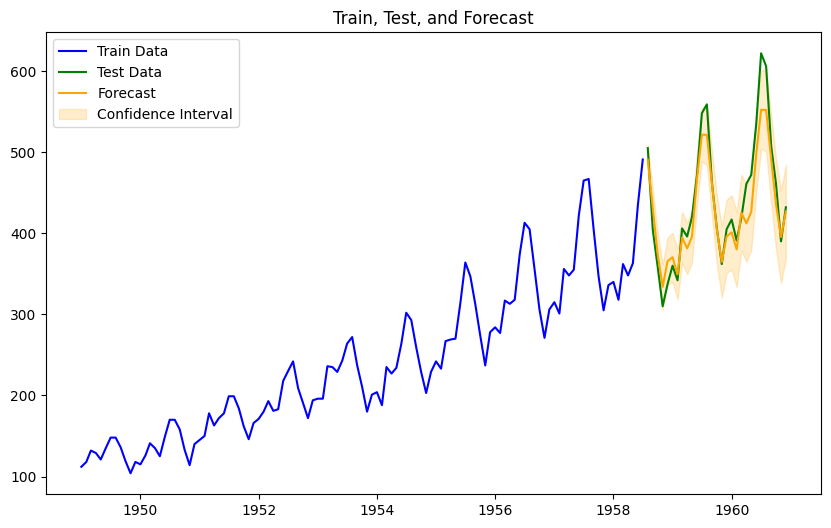

Hasil Forecasting
1958-08-01    490.604214
1958-09-01    430.822837
1958-10-01    374.436922
1958-11-01    334.048984
1958-12-01    365.422398
1959-01-01    370.416643
1959-02-01    349.397108
1959-03-01    394.704698
1959-04-01    381.474178
1959-05-01    395.696218
1959-06-01    467.014630
1959-07-01    521.603449
1959-08-01    521.377767
1959-09-01    461.481496
1959-10-01    405.176642
1959-11-01    364.734460
1959-12-01    396.146578
1960-01-01    401.115276
1960-02-01    380.114272
1960-03-01    425.409877
1960-04-01    412.188265
1960-05-01    426.404712
1960-06-01    497.727431
1960-07-01    552.313663
1960-08-01    552.090081
1960-09-01    492.192629
1960-10-01    435.888810
1960-11-01    395.446101
1960-12-01    426.858737
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
forecast_steps = len(test_data)
forecast = result.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['#Passengers'], label="Train Data", color='blue')
plt.plot(test_data.index, test_data['#Passengers'], label="Test Data", color='green')
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color='orange')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.2, label="Confidence Interval")
plt.legend()
plt.title("Train, Test, and Forecast")
plt.show()

print("Hasil Forecasting")
print(forecast_mean)

In [ ]:
# Hitung RMSE
rmse = np.sqrt(np.mean((test_data['#Passengers'].values - forecast_mean.values) ** 2))
print(f"RMSE: {rmse}")

RMSE: 26.803175776529443


Analisis

Model SARIMAX dengan parameter (2, 1, 2) untuk komponen ARIMA dan (0, 1, 1, 12) untuk komponen musiman mampu menangkap pola tren dan musiman dalam dataset AirPassengers.

Nilai RMSE yang relatif kecil menunjukkan model cukup akurat untuk prediksi jumlah penumpang dalam dataset ini.

Kesimpulan

Model SARIMAX berhasil menangkap tren dan pola musiman pada data AirPassengers dengan akurasi yang cukup baik, ditunjukkan oleh nilai RMSE sebesar 26.80. Model ini dapat digunakan untuk prediksi jangka pendek dengan tingkat kepercayaan yang baik.